# 波士顿房价预测-一元线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
boston_housing=tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y)=boston_housing.load_data()

x_train=train_x[:,5]
y_train=train_y

x_test=test_x[:,5]
y_test=test_y

learn_rate=0.04
iter=2000
display_step=200

np.random.seed(612)
w=tf.Variable(np.random.randn())
b=tf.Variable(np.random.randn())

57026/57026 [==============================] - 1s 9us/step


In [3]:
mse_train=[]
mse_test=[]

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        pred_train=w*x_train+b
        loss_train=0.5*tf.reduce_mean(tf.square(y_train-pred_train))
        
        pred_test=w*x_test+b
        loss_test=0.5*tf.reduce_mean(tf.square(y_test-pred_test))

    mse_train.append(loss_train)
    mse_test.append(loss_test)
    
    dL_dw,dL_db=tape.gradient(loss_train,[w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i%display_step==0:
        print("i: %i,Train Loss: %f, Test Loss: %f"%(i,loss_train,loss_test))

i: 0,Train Loss: 321.837585, Test Loss: 337.568634
i: 200,Train Loss: 28.122614, Test Loss: 26.237764
i: 400,Train Loss: 27.144741, Test Loss: 25.099327
i: 600,Train Loss: 26.341949, Test Loss: 24.141079
i: 800,Train Loss: 25.682899, Test Loss: 23.332981
i: 1000,Train Loss: 25.141851, Test Loss: 22.650158
i: 1200,Train Loss: 24.697672, Test Loss: 22.072006
i: 1400,Train Loss: 24.333025, Test Loss: 21.581432
i: 1600,Train Loss: 24.033665, Test Loss: 21.164263
i: 1800,Train Loss: 23.787905, Test Loss: 20.808697
i: 2000,Train Loss: 23.586145, Test Loss: 20.504938


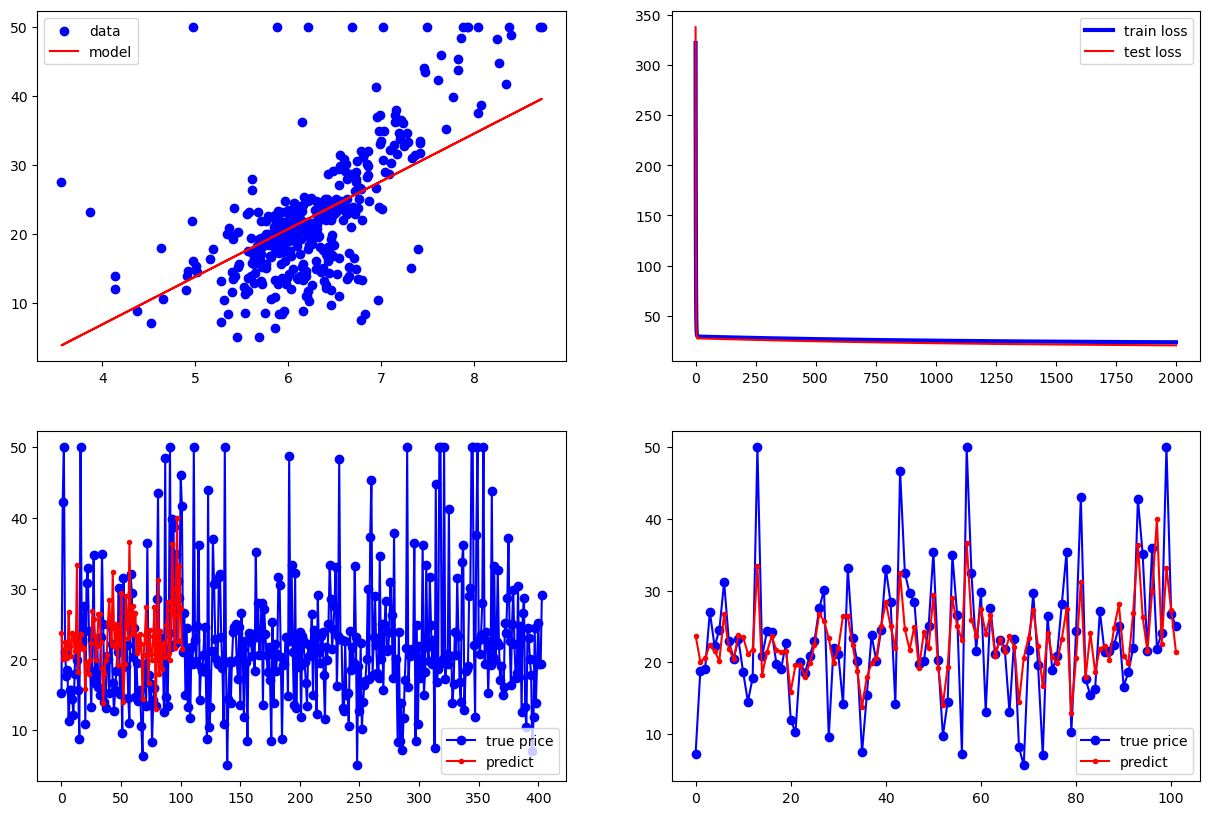

In [4]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.scatter(x_train,y_train,color="blue",label="data")
plt.plot(x_train,pred_train,color="red",label="model")
plt.legend(loc="upper left")

plt.subplot(2,2,2)
plt.plot(mse_train,color="blue",linewidth=3,label="train loss")
plt.plot(mse_test,color="red",linewidth=1.5,label="test loss")
plt.legend(loc="upper right")

plt.subplot(2,2,3)
plt.plot(y_train,color="blue",marker="o",label="true price")
plt.plot(pred_test,color="red",marker=".",label="predict")
plt.legend()

plt.subplot(2,2,4)
plt.plot(y_test,color="blue",marker="o",label="true price")
plt.plot(pred_test,color="red",marker=".",label="predict")
plt.legend()

plt.show()